# Time-evolving scenario discovery for infrastructure pathways

The purpose of this tutorial is to explore time-evolving vulnerability for systems that dynamically adapt to changing conditions. Using an example from water supply planning, we'll first examine how performance of a dynamic infrastructure pathway policy changes over time, then use factor mapping (main text Chapter 4.3) to understand which combinations of uncertaities generate vulnerability for two water utilities. Next, we'll perform factor prioritization (main text Chapter 4.3) to determine which uncertainties have the most influence on water supply performance. Finally, we'll provide an open platform to explore vulnerability across multiple measures of performance and different combinations of uncertainties.


## Background

The Bedford-Greene metropolitan area (Figure 1) is a stylized water resources test case where two urban water utilities seek to develop an infrastructure and investment and management strategy to confront growing demands and changing climate. The utilities have agreed to jointly construct a new water treatment plant on Lake Classon, a large regional resource. Both utilities have also identified a set of individual infrastructure options to construct if necessary.

![Figure 1](figs/Map_small.png)

The utilities are formulating a cooperative and adaptive regional management strategy that uses a risk-of-failure (ROF) metric to trigger both short term drought mitigation actions (water use restrictions and treated transfers between utilities) and long-term infrastructure investment decisions (shown in Figure 2a). Both utilities have specified a set of risk triggers and developed a construction order for available infrastructure options.

The utilities have run a Monte Carlo simulation to evaluate how these policies respond to a wide array of future States Of the World (SOWs). Each SOW represents a different combinations of thirteen uncertain system inputs including demand growth rates, changes to streamflows and financial variables. In this context, a fully specified SOW is composed of one sample of uncertain model inputs (e.g. one projection of demand growth rate coupled with one future streamflow scenario and one projection of future financial conditions). The water utilities used Latin Hypercube sampling (Chapter 3.3 of the main text) to develop an ensemble of 1,000 plausible future SOWs. The Monte Carlo simulation evaluates each candidate water supply infrastructure investment and management policy across all 1,000 SOWs, as shown in Figure 2b. For more details on the Monte Carlo sampling for this type  of analysis, see Trindade et al., (2019).

The ROF-based policies respond to each SOW by generating a unique infrastructure pathway - a sequence of infrastructure investment decisions over time. Infrastructure pathways over a set of 1,000 future SOWs are shown in Figure 2c. Infrastructure options are arrayed along the vertical axis and the sequence of infrastructure investments triggered by the policy is plotted as pathways over time.  Since the adaptive rule system generates a unique infrastructure sequence for each scenario, Figure 2c summarizes the ensemble of pathways by clustering SOWs according to infrastructure intensity. Dark green lines represent SOWs where the utilities heavily invest in new infrastructure, light green lines represent SOWs with low infrastructure investment and medium shaded lines represent moderate investment. The shading behind each pathway represents the frequency that each infrastructure option was triggered over time across sampled scenarios

![Figure 2](figs/Policy_MonteCarlo_Pathways_small.png)

## Evaluating Robustness over time

The two water utilities are interested in mainting both supply reliability and financial stability across the broadest set of plausible future SOWs. To measure the performance of the infrastructure pathway policy, they've defined five critical performance criteria:

- Reliability > 99%
- Restriction Frequency < 20%
- Peak Financial Cost < 80% of annual revenue (a measure of debt service spending)
- Worst-case drought management cost < 10% of annual revenue (a measure of unexpected drought costs)
- Unit Cost of Expansion < 5 dollars/kgal

To assess the robustness of the infrastructure pathway policy, the two utilities apply a satisficing metric, which measures the percentage of sampled SOWs where the pathway policy meets the peformance criteria:

$R =\frac{1}{N}\sum_{j=1}^{N}\Lambda_{\theta,j}$

Where,
$\Lambda_{\theta,j}=$
\begin{cases}
1, \quad \textrm{if}\ F(\theta)_{j}\leq \Phi_j \\
0, \quad \textrm{otherwise}
\end{cases}

And $\Phi$ is a vector of performance criteria for utility $j$, $\theta$ is the portfolio and $N$ is the total number of sampled SOWs.

Below, we'll visualize how robustness for the two utilities evolves over the 45-year planning horizon. We'll assess robustness across three time periods, near-term (first 10 years), mid-term (22 years) and long term (45 years).

We start by loading robustness values for the both utilities. These values are calculated by applying the robustness metric above across 2,000 simulated SOWs. To make this exercise computationally tractable, we've precomputed these values, which can be found in the files "short_term_robustness.csv", "mid_term_robustness.csv" and "long_term_robustness.csv". These values are calculated using the function "check_rdm_meet_criteria" within the helper functions.


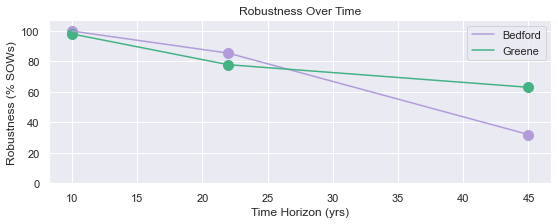

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from functions.eBook_SD_helpers import check_rdm_meet_criteria, create_sd_input, plot_selected_tree_maps, get_factor_importances, open_exploration
import seaborn as sns

# load Deeply uncertain factors
rdm_factors = np.loadtxt('data/DU_Factors.csv', delimiter= ',')

sns.set()
short_term_robustness = np.loadtxt('data/short_term_robustness.csv', delimiter= ',')
mid_term_robustness = np.loadtxt('data/mid_term_robustness.csv', delimiter = ',')
long_term_robustness = np.loadtxt('data/long_term_robustness.csv', delimiter = ',')

# plot robustness over time
fig =plt.figure(figsize=(9,3))
plt.plot([10,22,45], [short_term_robustness[5]*100, mid_term_robustness[5]*100,long_term_robustness[5]*100], c='#B19CD9')
plt.plot([10, 22, 45], [short_term_robustness[11]*100, mid_term_robustness[11]*100, long_term_robustness[11]*100], c= '#43b284')
plt.scatter([10,22,45], [short_term_robustness[5]*100, mid_term_robustness[5]*100,long_term_robustness[5]*100], s=100, c='#B19CD9')
plt.scatter([10, 22, 45], [short_term_robustness[11]*100, mid_term_robustness[11]*100, long_term_robustness[11]*100], s=100, c='#43b284')
plt.xlabel('Time Horizon (yrs)')
plt.ylabel('Robustness (% SOWs)')
plt.legend(['Bedford', 'Greene'])
plt.title('Robustness Over Time')
plt.ylim([0, 107])
plt.show()
plt.close()


## Exploring performance evolution

The figure above reveals that the robustness of both water utilities degrades over time, with Bedford's robustness declining further than Greene. This suggests that the proposed pathway policy is likely insufficient to meet the long-term needs of the two utilities. But how is the current policy insufficient? To answer that question we examine the performance measures that fail to meet performance criteria for each utility across the three planning horizons.

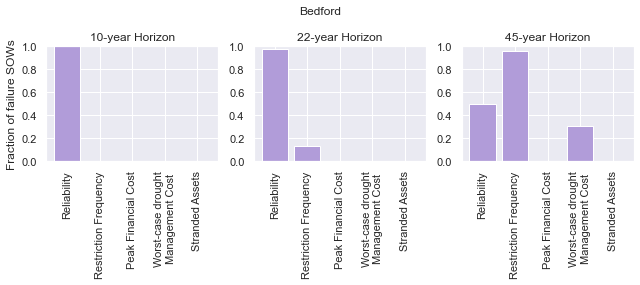

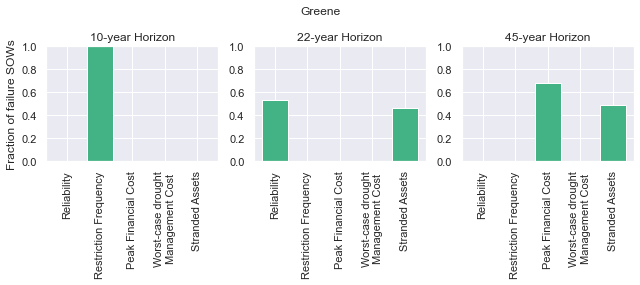

In [2]:
# Plot the type of vulnerability over time

### Bedford ###
plot_robustness_1 = np.zeros([3,5])
# Determine the percentage of failure SOWs that violate each criterion (note some SOWS fail multiple criteria, so this may some to >1)
criteria = ['Reliability', 'Restriction Frequency', 'Peak Financial Cost', 'Worst-case drought\nManagement Cost', 'Stranded Assets']
plot_robustness_1[0,:] = (1 - short_term_robustness[0:5])/(1-short_term_robustness[5])
plot_robustness_1[1,:] = (1 - mid_term_robustness[0:5])/(1-mid_term_robustness[5])
plot_robustness_1[2,:] = (1 - long_term_robustness[0:5])/(1-long_term_robustness[5])

# Plot over time
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,4))
axes[0].bar(np.arange(5), plot_robustness_1[0,:], color='#B19CD9')
axes[0].set_xticks(np.arange(5))
axes[0].set_xticklabels(criteria, rotation='vertical')
axes[0].set_ylim([0,1])
axes[0].set_title('10-year Horizon')
axes[0].set_ylabel('Fraction of failure SOWs')
axes[1].bar(np.arange(5), plot_robustness_1[1,:], color='#B19CD9')
axes[1].set_xticks(np.arange(5))
axes[1].set_xticklabels(criteria, rotation='vertical')
axes[1].set_ylim([0,1])
axes[1].set_title('22-year Horizon')
axes[2].bar(np.arange(5), plot_robustness_1[2,:], color='#B19CD9')
axes[2].set_xticks(np.arange(5))
axes[2].set_xticklabels(criteria, rotation='vertical')
axes[2].set_title('45-year Horizon')
axes[2].set_ylim([0,1])
fig.suptitle('Bedford')
plt.tight_layout()
plt.show()
plt.close()

### Greene ###
# Determine the percentage of failure SOWs that violate each criterion (note some SOWS fail multiple criteria, so this may some to >1)
plot_robustness_2 = np.zeros([3, 5])
plot_robustness_2[0, :] = (1 - short_term_robustness[6:11]) / (1 - short_term_robustness[11])
plot_robustness_2[1, :] = (1 - mid_term_robustness[6:11]) / (1 - mid_term_robustness[11])
plot_robustness_2[2, :] = (1 - long_term_robustness[6:11]) / (1 - long_term_robustness[11])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
axes[0].bar(np.arange(5), plot_robustness_2[0, :], color='#43b284')
axes[0].set_xticks(np.arange(5))
axes[0].set_xticklabels(criteria, rotation='vertical')
axes[0].set_title('10-year Horizon')
axes[0].set_ylim([0,1])
axes[0].set_ylabel('Fraction of failure SOWs')
axes[1].bar(np.arange(5), plot_robustness_2[1, :], color='#43b284')
axes[1].set_xticks(np.arange(5))
axes[1].set_xticklabels(criteria, rotation='vertical')
axes[1].set_title('22-year Horizon')
axes[1].set_ylim([0,1])
axes[2].bar(np.arange(5), plot_robustness_2[2, :], color='#43b284')
axes[2].set_xticks(np.arange(5))
axes[2].set_xticklabels(criteria, rotation='vertical')
axes[2].set_title('45-year Horizon')
axes[2].set_ylim([0,1])
fig.suptitle('Greene')
plt.tight_layout()
plt.show()
plt.close()


In the figures above, we observe that the vulnerability of both utilities changes in different ways. Early in the simulation period, Bedford is vulnerable to failures in reliability (though the robustness figure created in step B5.2 reveals that these failures are very rare). As the simulation period progresses, Bedford's vulnerability expands to include failures in restriction frequency and worst-case cost. These failures indicate that the utility has an overall inability to manage drought conditions and future conditions progress.

Greene shows a very different evolution in vulnerability. Early in the simulation period, failures manifest in the restriction frequency objective, suggesting that the utility must rely on water use restrictions to maintain supply reliability. As the simulation progresses however, the vulnerability evolves. When evaluated across the 45-year planning horizon, a new failure modes emerges - financial failure manifesting in peak financial cost and stranded assets. This suggests that the proposed pathway policy may be over-investing in new infrastructure, straining the utility's budget with large debt payments that are unnecessary to maintain supply reliability.

## How do deep uncertainties generate vulnerability

While the evolution of robustness provides insight into how the system evolves over time, it does not reveal *why* each utility is vulnerable. To examine how deep uncertainties generate vulnerability over time for the two utilities, we perform scenario discovery (factor mapping, Chapter 4.3). Here we'll utilize gradient boosted trees to identify regions of the uncertainty space that cause the utilities to fail to meet performance criteria.


Factor map for Bedford
Factor map for Bedford
Factor map for Bedford


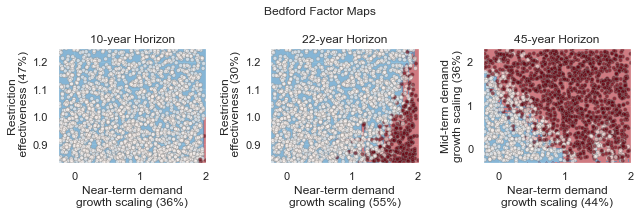

Factor map for Greene
Factor map for Greene
Factor map for Greene


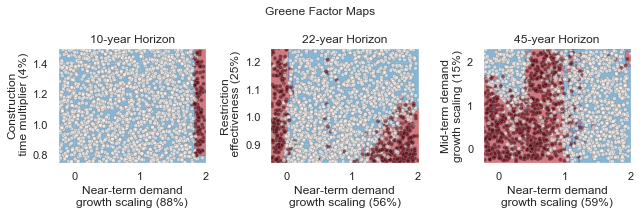

In [3]:
# import the performance data across 2000 SOWs for three time periods
short_term_performance = np.loadtxt('data/short_term_performance.csv', delimiter= ',')
mid_term_performance = np.loadtxt('data/mid_term_performance.csv', delimiter = ',')
long_term_performance = np.loadtxt('data/long_term_performance.csv', delimiter = ',')

satisficing_criteria = [.98, .2, .8, .1, 5]

# transform into scenario discovery input
short_term_SD_input = create_sd_input(short_term_performance, satisficing_criteria)
mid_term_SD_input = create_sd_input(mid_term_performance, satisficing_criteria)
long_term_SD_input = create_sd_input(long_term_performance, satisficing_criteria)

# factor mapping Bedford
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))
plot_selected_tree_maps(5, 'short_term', 0, 6, satisficing_criteria, 0, axes[0])
axes[0].set_title('10-year Horizon')
plot_selected_tree_maps(5, 'mid_term', 0, 6, satisficing_criteria, 0, axes[1])
axes[1].set_title('22-year Horizon')
plot_selected_tree_maps(5, 'long_term', 0, 1, satisficing_criteria, 0, axes[2])
axes[2].set_title('45-year Horizon')
fig.suptitle('Bedford Factor Maps')
plt.tight_layout()
plt.show()
plt.close()

# factor mapping Greene
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))
plot_selected_tree_maps(11, 'short_term', 0, 8, satisficing_criteria, 0, axes[0])
axes[0].set_title('10-year Horizon')
plot_selected_tree_maps(11, 'mid_term', 0, 6, satisficing_criteria, 0, axes[1])
axes[1].set_title('22-year Horizon')
plot_selected_tree_maps(11, 'long_term', 0, 1, satisficing_criteria, 0, axes[2])
axes[2].set_title('45-year Horizon')
fig.suptitle('Greene Factor Maps')
plt.tight_layout()
plt.show()
plt.close()


In the figures above, we learn more about how the vulnerability of the two utilities evolves over time. Bedford begins with very few possible failures but appears vulnerable to high demand growth scenarios under future scenarios with high demands. When evaluated across a 22-year planning horizon, Bedford is vulnerable when the near-term demand growth is high and water use restrictions are less effective than predicted. Under the full 45-year planning horizon, Bedford is vulnerable to sustained high levels of demand growth, failing if either near-term or mid-term demand growth exceeds expected levels.

Greene's vulnerability evolves differently. It begins with vulnerability to high demand growth, but as the simulation progresses (and infrastructure is constructed), the utility becomes vulnerable to low-demand growth futures which cause the failures in financial criteria shown in section B.5.3. This indicates that the pathway policy over-builds in many SOWs, and becomes financially unstable if demand does not grow sufficiently to provide revenue to cover debt service payments.

## Which uncertainties have the most influence on time-evolving performance?
The factor maps generated in B.5.4 present the vulnerability generated by the two most important deep uncertainties as determined by Gradient Boosted Trees. Yet the factor prioritization shows that more than two uncertainties are influential to regional performance. Further, we can observe that individual uncertainties have different impacts on each performance obejctive, and these impacts may change over time. In the cells below, explore the impact of deep uncertainty by generating factor maps for different combinations of deep uncertain factors, objectives and time horizons.

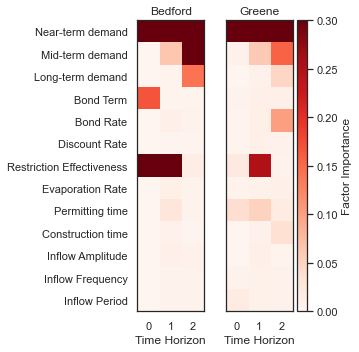

In [4]:
sns.set_style('white')
uncertainties = ['D1', 'D2', 'D3', 'BT', 'BM', 'DR', 'RE', 'EV', 'PM', 'CT', 'IA', 'IF', 'IP']
uncertainties = ['Near-term demand', 'Mid-term demand', 'Long-term demand', 'Bond Term', 'Bond Rate', 'Discount Rate', 'Restriction Effectiveness', 'Evaporation Rate', 'Permitting time', 'Construction time', 'Inflow Amplitude', 'Inflow Frequency', 'Inflow Period']

u1_st_FI = get_factor_importances(short_term_SD_input, rdm_factors, 250, 4, 5)
u1_mt_FI = get_factor_importances(mid_term_SD_input, rdm_factors, 250, 4, 5)
u1_lt_FI = get_factor_importances(long_term_SD_input, rdm_factors, 250, 4, 5)

u1_all = np.vstack([u1_st_FI,u1_mt_FI, u1_lt_FI])
u1_all = np.transpose(u1_all)

# factor ranking -- utility 2
u2_st_FI = get_factor_importances(short_term_SD_input, rdm_factors, 250, 4, 11)
u2_mt_FI = get_factor_importances(mid_term_SD_input, rdm_factors, 250, 4, 11)
u2_lt_FI = get_factor_importances(long_term_SD_input, rdm_factors, 250, 4, 11)
u2_all = np.vstack([u2_st_FI,u2_mt_FI, u2_lt_FI])
u2_all = np.transpose(u2_all)

fig, (ax, ax2, cax) = plt.subplots(ncols=3,figsize=(5,5),
                  gridspec_kw={"width_ratios":[1,1, 0.1]})
fig.subplots_adjust(wspace=0.3)
im = ax.imshow(u1_all, cmap='Reds', vmin=0, vmax=.3)
ax.set_yticks(np.arange(13))
ax.set_yticklabels(uncertainties)
ax.set_xticks(np.arange(3))
ax.set_xlabel('Time Horizon')
ax.set_title('Bedford')

im1 = ax2.imshow(u2_all, cmap='Reds', vmin=0, vmax=.3)
ax2.set_yticks(np.arange(13))
ax2.set_yticklabels([])
ax2.set_xticks(np.arange(3))
ax2.set_xlabel('Time Horizon')
ax2.set_title('Greene')
fig.colorbar(im, cax=cax, label='Factor Importance')
plt.tight_layout()
plt.show()
plt.close()


The Figure above shows the factor importance as determined by gradient boosted trees for both utilities across the three planning horizons. While near-term demand growth is important for both utilities under all three planning horizons, the importance of other factors evolves over time. For example, restriction effectiveness plays an important role for Greene under the 22-year planning horizon but disappears under the 45-year planning horizon. In contrast, the bond interest rate is important for predicting success over the 45-year planning horizon, but does not appear important over the 10- or 22-year planning horizons. These findings highlight how assumptions about the planning period can have a large impact on modeling outcomes.

## Open exploration

In the cell below, use the function to explore how factor maps change for the two utilities based upon the uncertainties plotted, the objectives of interest and the time horizon.

Factor map for Bedford, reliability
Factor map for Bedford, reliability
Factor map for Bedford, reliability


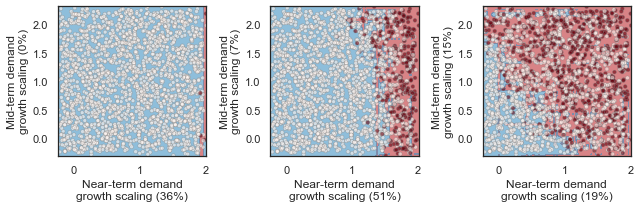

In [5]:
# specify the utility ("Bedford" or "Greene")
utility = "Bedford"

# specify which performance objectives to investigate (note that not all performance objectives have failures, which may result in a blank factor map)
# set this to one of the following: "Reliability", "Restriction Frequency", "Peak Financial Cost", "Worst Case Cost" or "Unit Cost"
objective = "Reliability"

# select uncertainties from the following list: 'D1', 'D2', 'D3', 'BT', 'BM', 'DR', 'RE', 'EV', 'PM', 'CT', 'IA', 'IF', 'IP'
uncertainty_1 = 'D1'
uncertainty_2 = 'D2'

# The code below will plot factor maps over the three planning horizons for the information above
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))
open_exploration(utility, objective, 'short_term', uncertainty_1, uncertainty_2, axes[0])
open_exploration(utility, objective, 'mid_term', uncertainty_1, uncertainty_2, axes[1])
open_exploration(utility, objective, 'long_term', uncertainty_1, uncertainty_2, axes[2])
plt.tight_layout()
plt.show()
plt.close()


## Tips to apply this methodology to your own problem

In this tutorial, we demonstrated time-evolving scenario discovery for a cooperative water supply system. To apply this workflow to your own problem:

1. Choose sampling bounds for your parameters of interest, which will represent uncertainties that characterize your system.
2. Generate samples for these parameters (this can be done using the saltelli.sample function as in B.2  or done with another package).
3. Define performance criteria for your problem
4. Evaluate parameter sets through your model, and save performance measures across multiple time horizons
5. Draw from the supporting code for this tutorial to perform scneario discovery and visualize results

## References

Trindade, B. C., Reed, P. M., & Characklis, G. W. (2019). Deeply uncertain pathways: Integrated multi-city regional water supply infrastructure investment and portfolio management. Advances in Water Resources, 134, 103442.